In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import warnings
from secret import path
warnings.filterwarnings("ignore")

In [4]:
main_df = pd.read_csv(path+"\\creditcard.csv")
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
(main_df[main_df.columns].isnull().sum()/main_df.shape[0])*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

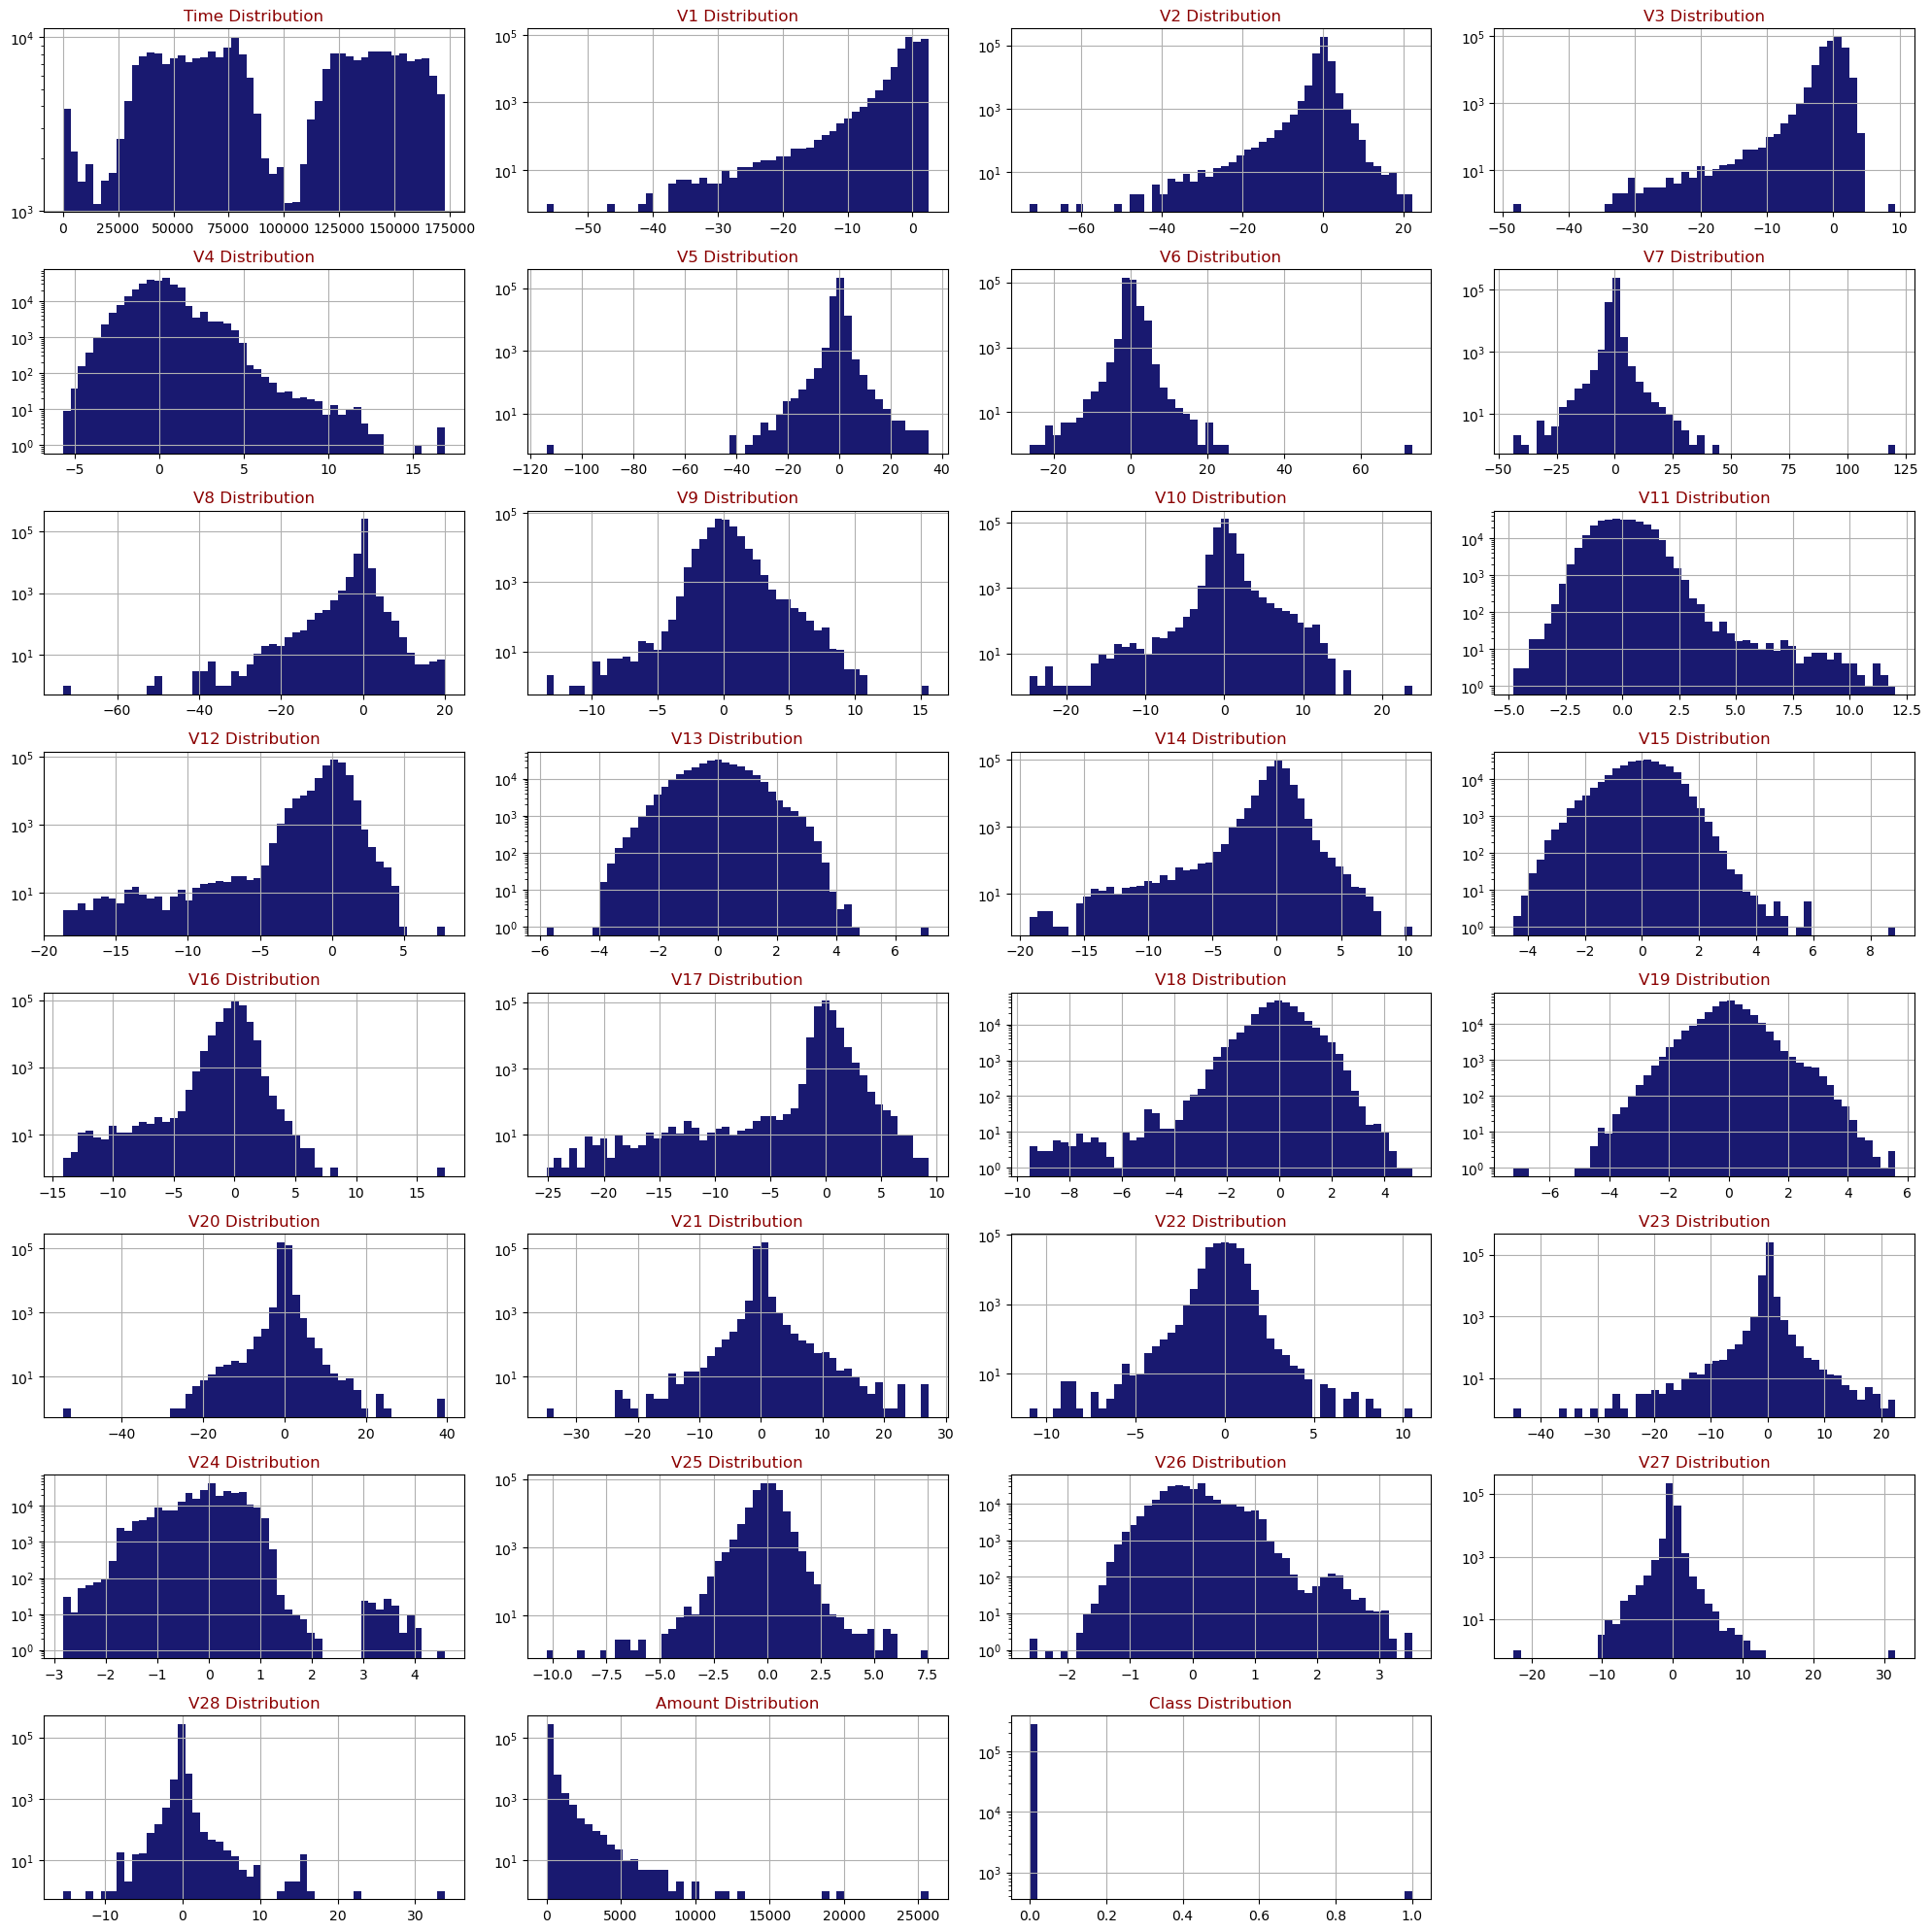

In [6]:
def draw_histograms(df, features, rows, columns):
    fig = plt.figure(figsize=(20, 20))
    for i, features in enumerate(features):
        ax = fig.add_subplot(rows, columns, i+1)
        df[features].hist(bins = 50, ax = ax, facecolor='midnightblue')
        ax.set_title(features+" Distribution", color="DarkRed")
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
    
draw_histograms(main_df, main_df.columns, 8, 4)

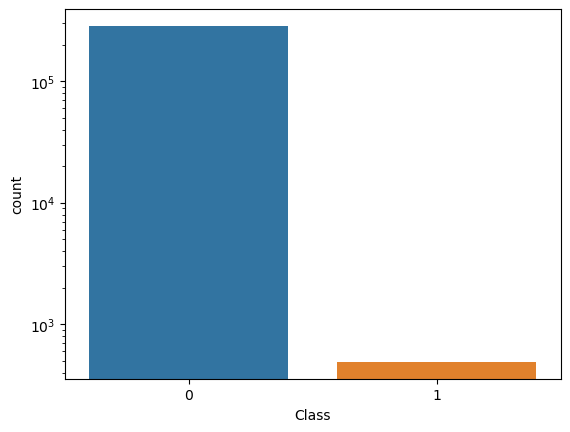

In [7]:
ax = sns.countplot(x="Class", data=main_df)
ax.set_yscale("log")

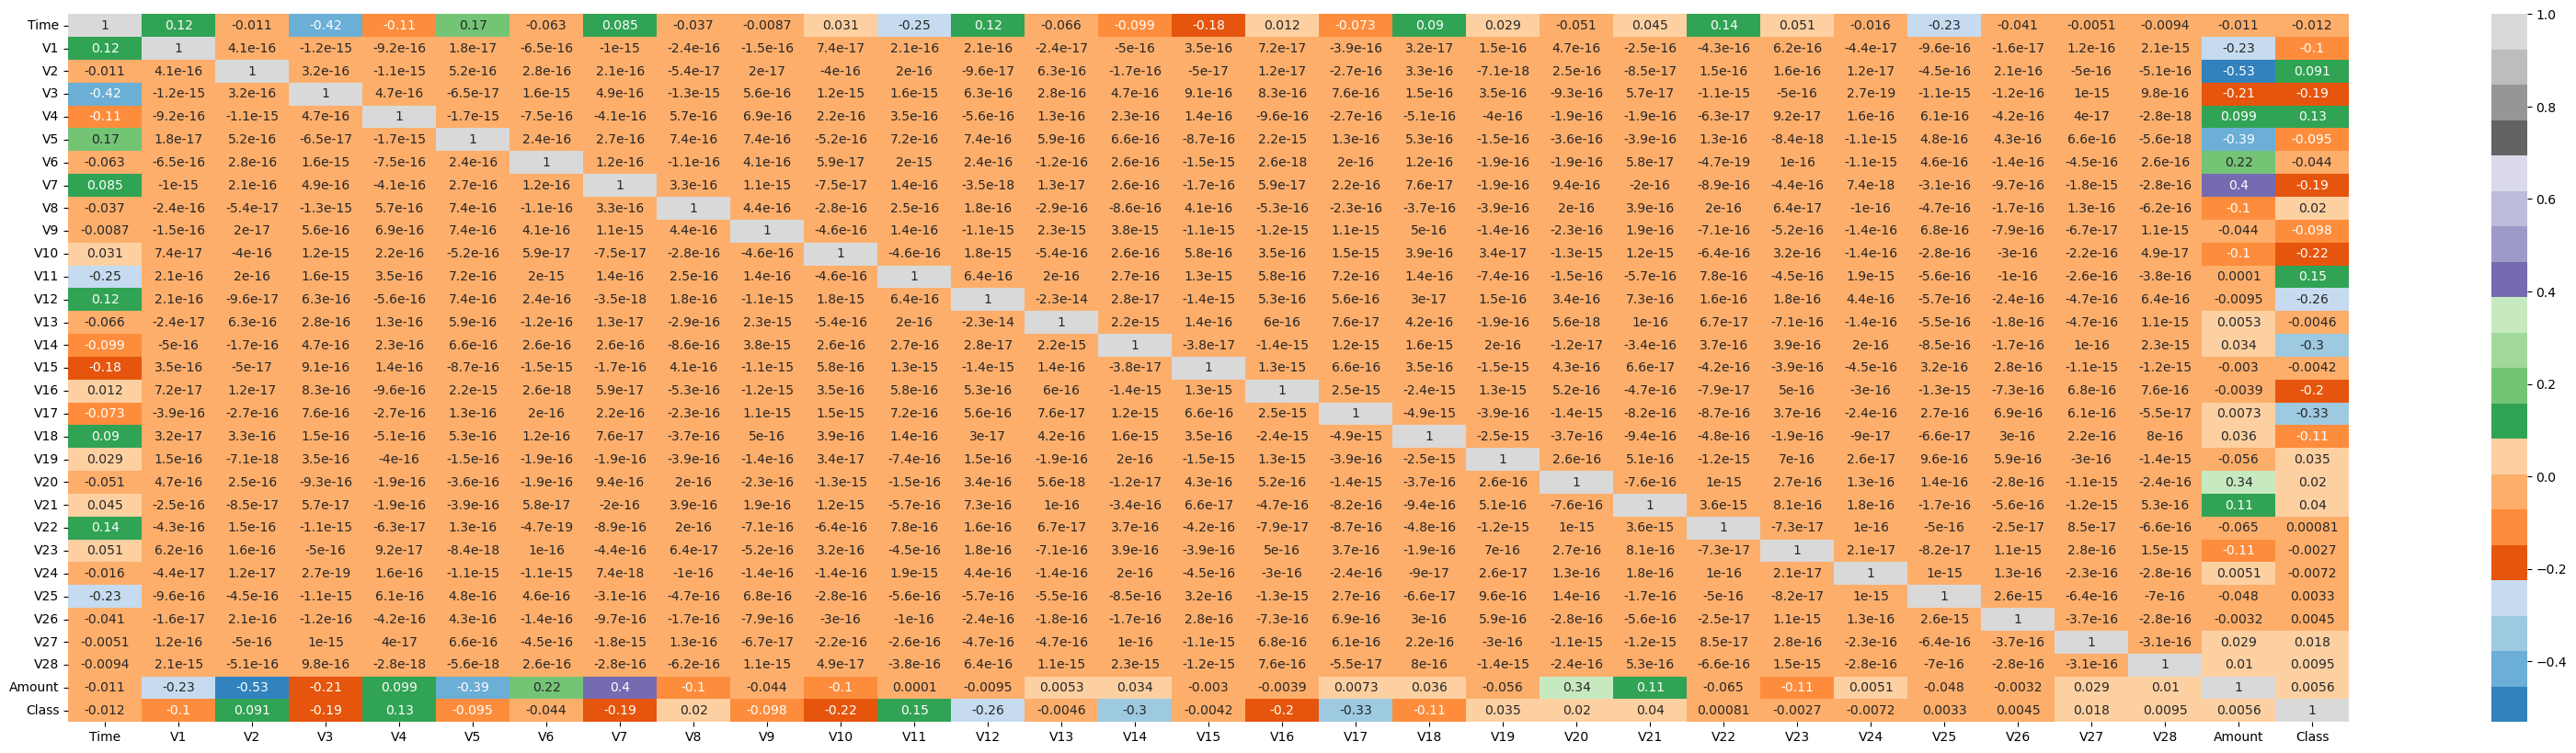

In [8]:
plt.figure(figsize = (40,10))
sns.heatmap(main_df.corr(), annot = True, cmap="tab20c")
plt.show()

In [26]:
X = main_df[main_df.columns[1:-2]]
y = main_df['Class']

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
feature_importance = lr_model.coef_[0]

array([ 0.04494745, -0.0350849 ,  0.00752398,  0.67847757,  0.02763951,
       -0.08974135, -0.02761496, -0.20213764, -0.15143501, -0.59525763,
       -0.04429028, -0.03719311, -0.25565408, -0.60403684, -0.06615457,
       -0.27984264, -0.00541966, -0.00154605, -0.03278744, -0.23811693,
        0.35870253,  0.55895074, -0.11578254,  0.12493273, -0.09161273,
        0.06712822, -0.61315661, -0.34988543])

In [34]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': abs(feature_importance)})
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df.reset_index()
feature_importance_df.drop(columns="index", inplace=True)
feature_importance_df

,Feature,Importance
0,V4,0.678478
1,V27,0.613157
2,V14,0.604037
3,V10,0.595258
4,V22,0.558951
5,V21,0.358703
6,V28,0.349885
7,V16,0.279843
8,V13,0.255654
9,V20,0.238117


In [52]:
top_n_features = feature_importance_df['Feature'][:10].tolist()
top_n_features

['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18', 'V9', 'V7', 'V4']

In [53]:
# Use only the selected features for testing
X_test_selected = X_test[top_n_features]
X_test_selected


,V17,V14,V12,V10,V16,V11,V18,V9,V7,V4
43428,-19.236292,-9.373859,-10.834006,-14.110184,-9.899247,5.299236,-8.398552,-8.507059,-16.701694,9.505594
49906,0.126956,-0.217884,0.979427,-0.565012,-2.142892,-0.087670,1.752662,0.899746,-0.524379,-1.385729
29474,-0.533172,-0.245772,0.112453,0.756801,1.769860,0.543827,-0.533300,-0.971747,-0.712567,-1.029950
276481,0.502195,-0.550875,0.223621,-1.376648,0.497974,-1.328335,0.981343,-0.484715,0.276990,-0.349504
278846,-0.471867,0.592634,0.850038,0.259452,0.091077,0.942162,-0.333816,0.363241,0.043241,0.327269
...,...,...,...,...,...,...,...,...,...,...
180795,0.477920,-0.610707,1.286576,-0.862528,0.477090,0.861307,0.382276,-0.665095,-0.228012,-1.051308
259979,-0.595918,0.177262,0.251877,0.061213,0.131953,-1.396327,-0.612472,0.551045,0.124248,0.125578
21885,0.207875,-0.222170,-0.756965,-0.316982,-0.126110,-1.751384,0.013024,1.662617,-0.857322,1.631418
217812,0.447790,-0.869580,0.187143,-0.380899,0.326745,-0.596944,-0.303867,0.481197,0.190703,0.403323


In [54]:
X_train_selected = X_train[top_n_features]
lr_model.fit(X_train_selected, y_train)
y_pred = lr_model.predict(X_test_selected)


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9992158515033414
Precision: 0.8556701030927835
Recall: 0.6102941176470589
F1 Score: 0.7124463519313304
Confusion Matrix:
 [[85293    14]
 [   53    83]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import ttest_ind

In [48]:
t_scores = []
for column in X.columns:
    t_stat, _ = ttest_ind(X[y == 0][column], X[y == 1][column])
    t_scores.append((column, abs(t_stat)))

t_scores.sort(key=lambda x: x[1], reverse=True)

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

N = 10 
top_influential_features_ttest = [feature for feature, _ in t_scores[:N]]
top_influential_features_rf = feature_importance_df['Feature'][:N].tolist()

print("Top Influential Features (t-test):", top_influential_features_ttest)
print("Top Influential Features (Random Forest):", top_influential_features_rf)

Top Influential Features (t-test): ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']
Top Influential Features (Random Forest): ['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18', 'V9', 'V7', 'V4']


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
selected_features_combined = list(set(top_influential_features_ttest).union(top_influential_features_rf))

# Extract the selected features from your dataset
X_train_selected = X_train[selected_features_combined]
X_test_selected = X_test[selected_features_combined]

# Model Training and Evaluation
# 1. Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# 2. Train a Logistic Regression classifier
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected, y_train)
y_pred_logistic = logistic_model.predict(X_test_selected)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the results
print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Classification Report:\n", classification_report_rf)

print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_matrix_logistic)
print("Classification Report:\n", classification_report_logistic)

Random Forest Model:
Accuracy: 0.9996254813150287
Confusion Matrix:
 [[85302     5]
 [   27   109]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443


Logistic Regression Model:
Accuracy: 0.9992158515033414
Confusion Matrix:
 [[85293    14]
 [   53    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.61      0.71       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [67]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9996254813150287
Precision: 0.956140350877193
Recall: 0.8014705882352942
F1 Score: 0.8720000000000001
Confusion Matrix:
 [[85302     5]
 [   27   109]]


In [64]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9992158515033414
Precision: 0.8556701030927835
Recall: 0.6102941176470589
F1 Score: 0.7124463519313304
Confusion Matrix:
 [[85293    14]
 [   53    83]]


In [60]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lr_model, n_features_to_select=N)
rfe.fit(X_train, y_train)
selected_features = [feature for feature, selected in zip(X_train.columns, rfe.support_) if selected]
selected_features

['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27', 'V28']

In [62]:
top_n_features = selected_features
X_train_selected = X_train[top_n_features]
lr_model.fit(X_train_selected, y_train)
y_pred = lr_model.predict(X_test_selected)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- V11
- V12
- V17
- V18
- V7
- ...
Feature names seen at fit time, yet now missing:
- V13
- V21
- V22
- V27
- V28
- ...
